In [1]:
import gzip
import json
from config import DATASET_PATH

# Read dataset from the file
f = gzip.open(DATASET_PATH, "r")
# Process the lines into a preliminary dictionary
full_dataset = [json.loads(line) for line in f.readlines()]
f.close()

In [26]:
from data_processing import clean_dataset

# process the data (lemmatize, feature generation)
features, labels = clean_dataset(full_dataset, 5000)

C:\Users\emmet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


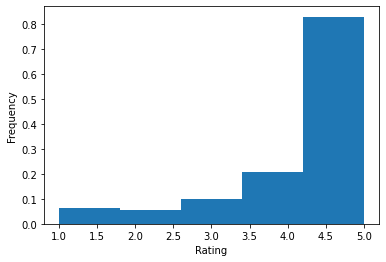

In [27]:
import matplotlib.pyplot as plt 
# Visualize the ratings distribution
plt.hist(labels, density=True, bins=5)
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.show()

In [28]:
# Feature array
print(features.head())

   abbrev  abbreviate  abdomen  abdominal  abilities  ability  ablaze  able  \
0     0.0         0.0      0.0        0.0        0.0      0.0     0.0   0.0   
1     0.0         0.0      0.0        0.0        0.0      0.0     0.0   0.0   
2     0.0         0.0      0.0        0.0        0.0      0.0     0.0   0.0   
3     0.0         0.0      0.0        0.0        0.0      0.0     0.0   0.0   
4     0.0         0.0      0.0        0.0        0.0      0.0     0.0   0.0   

   abnormal  abnormally  ...  yrs  yuk  yup  zap  zealous  zero  zinc  zip  \
0       0.0         0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   
1       0.0         0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   
2       0.0         0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   
3       0.0         0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   
4       0.0         0.0  ...  0.0  0.0  0.0  0.0      0.0   0.0   0.0  0.0   

   zone  zoom  
0   0.0   0.0  
1   0.0   0.0  
2   0.0 

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import importlib
import config
importlib.reload(config)
from config import PALETTE

def visualize_confusion_matrix(confusion):
    sns.heatmap(confusion, annot = True, cmap=PALETTE, fmt="g")
    plt.xlabel("Predicted Class")
    plt.ylabel("True class")
    plt.show()

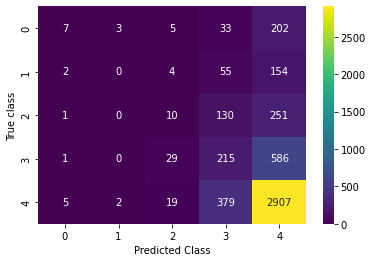

0.6278


In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

y_pred = cross_val_predict(SVC(class_weight="balanced", C=1.25), features, labels, cv = 5)
visualize_confusion_matrix(confusion_matrix(labels, y_pred))
print(accuracy_score(labels, y_pred))

C:\Users\emmet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\emmet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\emmet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\emmet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\emmet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature name

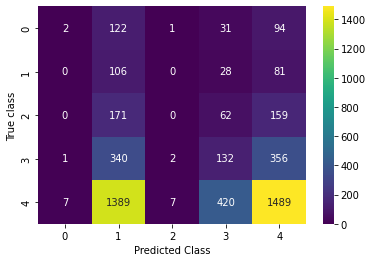

0.3458


In [31]:
from sklearn.neighbors import KNeighborsClassifier

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=3, weights="distance"), features, labels, cv = 5)
visualize_confusion_matrix(confusion_matrix(labels, y_pred))
print(accuracy_score(labels, y_pred))

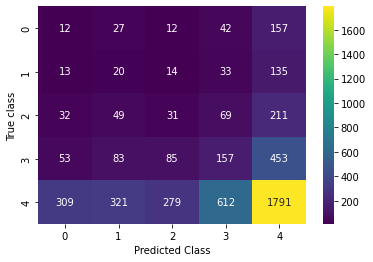

0.4022


In [32]:
from sklearn.naive_bayes import GaussianNB

y_pred = cross_val_predict(GaussianNB(), features, labels, cv = 5)
visualize_confusion_matrix(confusion_matrix(labels, y_pred))
print(accuracy_score(labels, y_pred))